# Introduction
## Idea 
The proposed project will focus on utilizing deep learning to detect facial expressions in humans. While there have been many projects in the past that dealt with expression classification: (https://github.com/atulapra/Emotion-detection) and (https://tinyurl.com/1m4km78w), one motif we noticed throughout examining these projects is that the training accuracy on the expression classifier is often much higher than the validation accuracy. In other words, it may be the case that these models have a hard time generalizing expressions among different faces. This is perhaps due to the large variety of different faces present in the dataset.

While we will not attempt to improve the ability of deep learning models to generalize facial expression in this project, we will attempt to improve model performance for specific users. The overall idea is to train a model jointly, using both a general dataset of facial expressions as well as a dataset of a particular user’s facial expressions.

## Pipeline Overview
There will be three main parts to the pipline we want to create. Facial detection, general expression classification, and specific expression classification. Images containing (or not) human faces will be fed into the pipeline. Now, the first step in the pipeline will be to detect faces (or lack thereof). The most convenient way to do this is to use a pre-trained model provided by OpenCV. The facial detection step of the pipeline will output cropped images of faces, which is then fed into the next (and final) step of the pipeline to perform expression classification. Now, to train the expression classification step of the pipeline, we will first train a general CNN (same architecture as here: https://github.com/atulapra/Emotion-detection) with a general facial expression dataset (FER-13). Next, we will perform transfer learning on a specific CNN. We will freeze the convolutional layers of the previously trained general CNN and use that as the convolutional layers of the specific CNN. The fully-connected layers of the original CNN will then be trained by passing a specific dataset of user’s facial expressions.

## Dataset
The general dataset we are using is FER-13 with 7 classes (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The training set contains 28,709 examples. The public test set contains 3,589 examples, and the private test set contains another 3,589 examples.

In [1]:
# import pipeline
from src.pipeline import Pipeline
import numpy as np
p = Pipeline()

# Pipeline Rundown
First train the general model using the FER13 face data

# Experiments
We have seen in the above above pipeline that as 

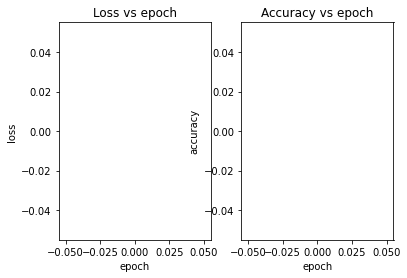

Specific training complete!
test loss: 3.9649023409232353, test accuracy: 35.344825744628906
Confusion matrix:
[[ 5  0  2  0  0  0 12]
 [ 0  0  0  0  5  0 13]
 [ 0  0  0  0  0  0 20]
 [ 0  0  0  7  0  0  2]
 [ 0  0  0  0  0  0 18]
 [ 0  0  0  0  0  9  3]
 [ 0  0  0  0  0  0 20]]
F1-score: [0.41666667 0.         0.         0.875      0.         0.85714286
 0.37037037]
test loss: 1.173687859040624, test accuracy: 63.02591323852539
Confusion matrix:
[[265   2  45  22  69  11  53]
 [ 14  27   4   0   8   0   3]
 [ 54   1 171  23 136  49  62]
 [ 18   2  14 771  25  14  51]
 [ 79   0  53  32 368  14 107]
 [ 17   1  33  20  11 318  15]
 [ 43   0  30  64 125   3 342]]
F1-score: [0.553814   0.60674157 0.40425532 0.84400657 0.52759857 0.77184466
 0.5516129 ]
Batch 0 loss: 4.0215535163879395, accuracy: 0.3125
Batch 1 loss: 1.8502106666564941, accuracy: 0.390625
Batch 2 loss: 2.081662893295288, accuracy: 0.40625
Batch 3 loss: 2.3545258045196533, accuracy: 0.4140625
Batch 4 loss: 1.8855791091918945

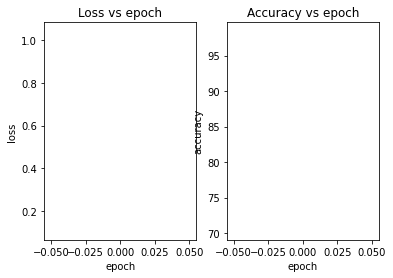

Specific training complete!
test loss: 0.22243324885625795, test accuracy: 93.96551513671875
Confusion matrix:
[[18  1  0  0  0  0  0]
 [ 0 16  0  0  2  0  0]
 [ 0  0 19  0  1  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  0 18  0  0]
 [ 0  1  0  0  1 10  0]
 [ 0  0  0  0  1  0 19]]
F1-score: [0.97297297 0.88888889 0.97435897 1.         0.87804878 0.90909091
 0.97435897]


KeyboardInterrupt: 

In [2]:
pex1 = Pipeline()
pex1.ingest_fer13_data("data/icml_face_data.csv")
pex1.ingest_specific_data("data/specific_dataset", train_ratio=0.8)

specific_losses = []
specific_accuracies = []
fer13_losses = []
fer13_accuracies = []

epochs_list = np.arange(11)



for epochs in epochs_list:
    # load the previous model
    pex1.load_model("data/general_model.pt", mode="train")
    
    pex1.train_specific_model("data/temp.pt", 
                           learning_rate=1e-3, 
                           n_epochs=epochs, 
                           stop_thr=1e-5, 
                           use_valid=True, 
                           batch_size=32)
    
    sp_loss, sp_acc, _, _ = pex1.evaluate_specific_model()
    fer_loss, fer_acc, _, _ = pex1.evaluate_general_model()
    
    specific_accuracies.append(sp_acc)
    specific_losses.append(sp_loss)
    fer13_accuracies.append(fer_acc)
    fer13_losses.append(fer_loss)
    